## Problem Statement
Most organizations today rely on email campaigns for effective communication with users. Email communication is one of the popular ways to pitch products to users and build trustworthy relationships with them.

Email campaigns contain different types of CTA (Call To Action). The ultimate goal of email campaigns is to maximize the Click Through Rate (CTR).
CTR is a measure of success for email campaigns. The higher the click rate, the better your email marketing campaign is. CTR is calculated by the no. of users who clicked on at least one of the CTA divided by the total no. of users the email was delivered to.
CTR =   No. of users who clicked on at least one of the CTA / No. of emails delivered
CTR depends on multiple factors like design, content, personalization, etc. 
How do you design the email content effectively?
What should your subject line look like?
What should be the length of the email?
Do you need images in your email template?
As a part of the Data Science team, in this hackathon, you will build a smart system to predict the CTR for email campaigns and therefore identify the critical factors that will help the marketing team to maximize the CTR.

## Objective
Your task at hand is to build a machine learning-based approach to predict the CTR of an email campaign.

## About the Dataset
You are provided with the information of past email campaigns containing the email attributes like subject and body length, no. of CTA, date and time of an email, type of the audience, whether its a personalized email or not, etc and the target variable indicating the CTR of the email campaign.



## Importing Libraries

In [1]:
#importing numpy pandas to read and work on data
import numpy as np
import pandas as pd
# importing matplotlib and seaborn to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
#importing statsmodels to linear rigression
import statsmodels.api as sm
#importing sklearn preprocessing and train test split to split data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# to evaluating and cross validating model importing some libraries
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import r2_score
#imprting warning to ignore warning
import warnings
warnings.filterwarnings("ignore")

## Reading train data

In [2]:
#reading data
train= pd.read_csv("train_F3fUq2S.csv")
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [3]:
#shape of data
train.shape

(1888, 22)

In [4]:
#checking data type of features
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [5]:
# by checking data type we got to know that all columns are numerical only one column is catogorical

## checking the null values

In [6]:
#using is null to check null values
train.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [7]:
# displaying catogoric featues seperatly
train_categoric = train.select_dtypes(include = object)
train_categoric.columns

Index(['times_of_day'], dtype='object')

In [8]:
# displying numeric feature seperatly
train_numeric = train.select_dtypes(include=np.number)
train_numeric.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'category',
       'product', 'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised',
       'is_quote', 'is_timer', 'is_emoticons', 'is_discount', 'is_price',
       'is_urgency', 'target_audience', 'click_rate'],
      dtype='object')

In [9]:
# checking the unique values in categorical column
train.times_of_day.unique()

array(['Noon', 'Morning', 'Evening'], dtype=object)

In [10]:
#removing Unnecessary column from data set 
train=train.drop(['campaign_id'],axis=1)

### Finding Co-Realation

In [11]:
#checking co-realation of data
corr=train.corr()
corr

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
sender,1.000000,-0.102559,0.197929,0.056891,-0.046928,-0.059499,0.188444,0.070689,0.100454,0.016604,-0.093244,0.147959,0.020928,NaN,-0.105279,-0.046900,0.024099,-0.071096,-0.132554,-0.031398
subject_len,-0.102559,1.000000,0.427326,-0.224770,-0.033574,-0.056666,0.012601,-0.007108,0.400213,0.144261,-0.002214,-0.293446,0.120273,NaN,0.080303,0.125134,0.033410,0.100584,-0.021855,-0.180143
body_len,0.197929,0.427326,1.000000,-0.496146,-0.089146,-0.079255,0.026781,-0.027747,0.559353,0.083468,-0.021254,-0.220696,0.184035,NaN,-0.043931,0.051123,0.022431,0.023734,-0.075754,-0.247866
mean_paragraph_len,0.056891,-0.224770,-0.496146,1.000000,0.003221,-0.012964,0.037475,-0.054066,-0.170012,0.064632,-0.091250,0.162480,-0.096086,NaN,-0.043173,-0.032096,0.006765,-0.037435,-0.110896,0.178042
day_of_week,-0.046928,-0.033574,-0.089146,0.003221,1.000000,0.720599,-0.058760,0.000249,-0.037789,-0.003614,0.019365,-0.069705,-0.032476,NaN,-0.013571,-0.037122,-0.013822,0.012735,0.081693,0.086372
is_weekend,-0.059499,-0.056666,-0.079255,-0.012964,0.720599,1.000000,-0.063763,-0.015759,-0.033464,-0.032421,0.036626,-0.065130,-0.033968,NaN,-0.007504,-0.033757,-0.036255,-0.009789,0.046638,0.114138
category,0.188444,0.012601,0.026781,0.037475,-0.058760,-0.063763,1.000000,0.007144,-0.023931,0.127554,-0.028794,0.132441,-0.101411,NaN,0.100071,0.166200,0.068450,0.189839,-0.026602,-0.167756
product,0.070689,-0.007108,-0.027747,-0.054066,0.000249,-0.015759,0.007144,1.000000,0.027486,0.043223,0.027952,0.047566,-0.104653,NaN,0.013122,-0.018291,-0.060512,-0.110753,0.058073,0.121602
no_of_CTA,0.100454,0.400213,0.559353,-0.170012,-0.037789,-0.033464,-0.023931,0.027486,1.000000,0.170387,-0.005971,-0.145453,0.092320,NaN,-0.037244,0.041797,-0.015229,-0.015649,-0.007979,-0.172637
mean_CTA_len,0.016604,0.144261,0.083468,0.064632,-0.003614,-0.032421,0.127554,0.043223,0.170387,1.000000,-0.021751,-0.123560,0.023271,NaN,0.032827,0.029194,0.013934,0.100071,0.007170,-0.031162


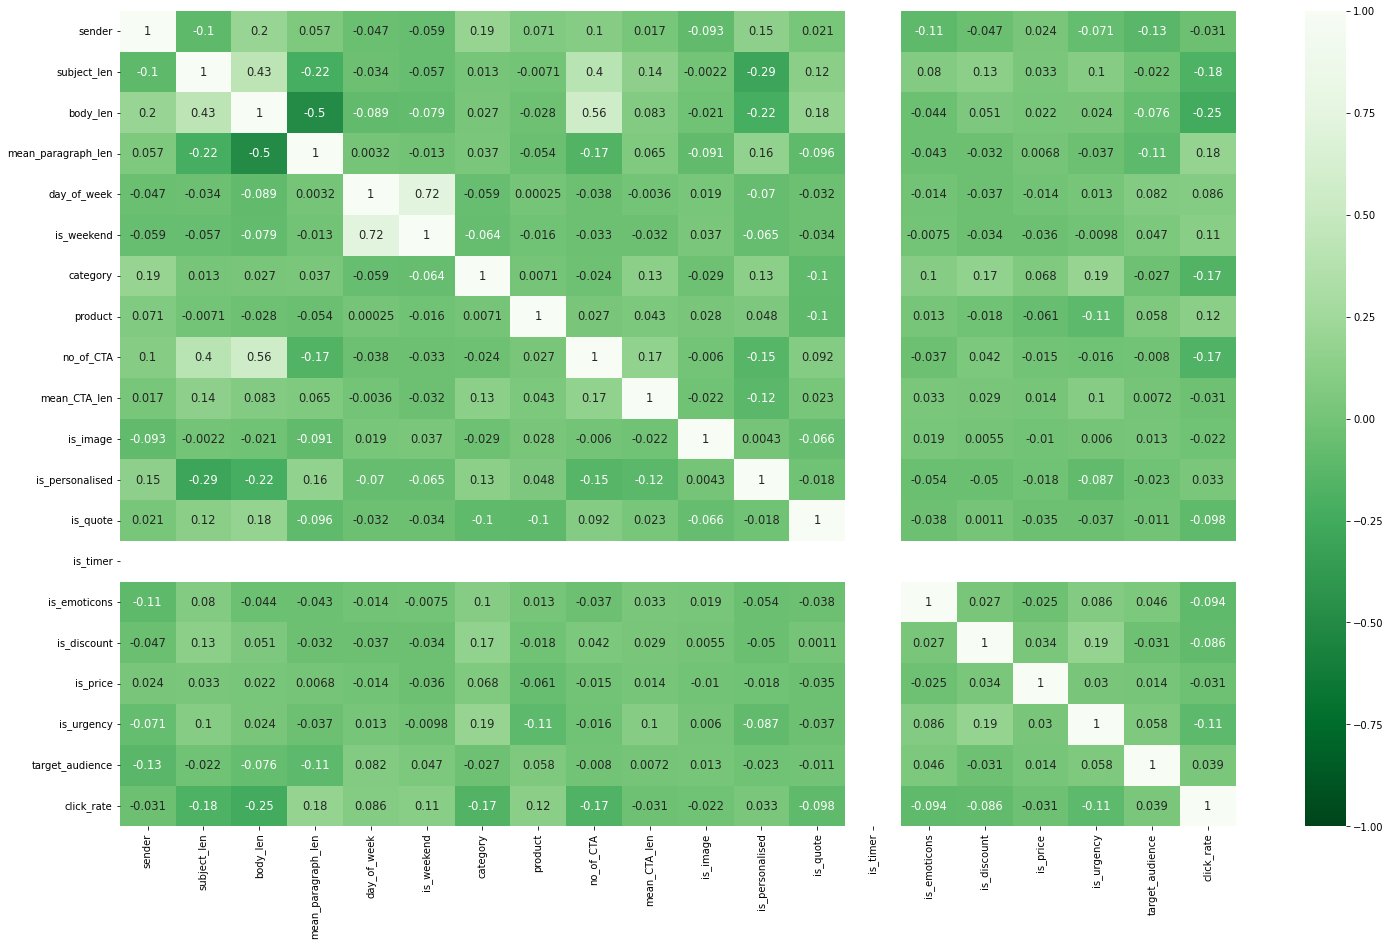

In [12]:
#ploting correlation
plt.figure(figsize = (25,15))
sns.heatmap(corr, annot = True, vmax = 1.0, vmin = -1.0, cmap = 'Greens_r', annot_kws = {"size": 11.5})
plt.show()

In [13]:
# printing co-relation related to target
corr_matrix =corr
corr_matrix['click_rate'].sort_values(ascending=False)

click_rate            1.000000
mean_paragraph_len    0.178042
product               0.121602
is_weekend            0.114138
day_of_week           0.086372
target_audience       0.038713
is_personalised       0.032922
is_image             -0.021527
is_price             -0.030540
mean_CTA_len         -0.031162
sender               -0.031398
is_discount          -0.086105
is_emoticons         -0.094305
is_quote             -0.098402
is_urgency           -0.114284
category             -0.167756
no_of_CTA            -0.172637
subject_len          -0.180143
body_len             -0.247866
is_timer                   NaN
Name: click_rate, dtype: float64

## Visualizations

<function matplotlib.pyplot.show(close=None, block=None)>

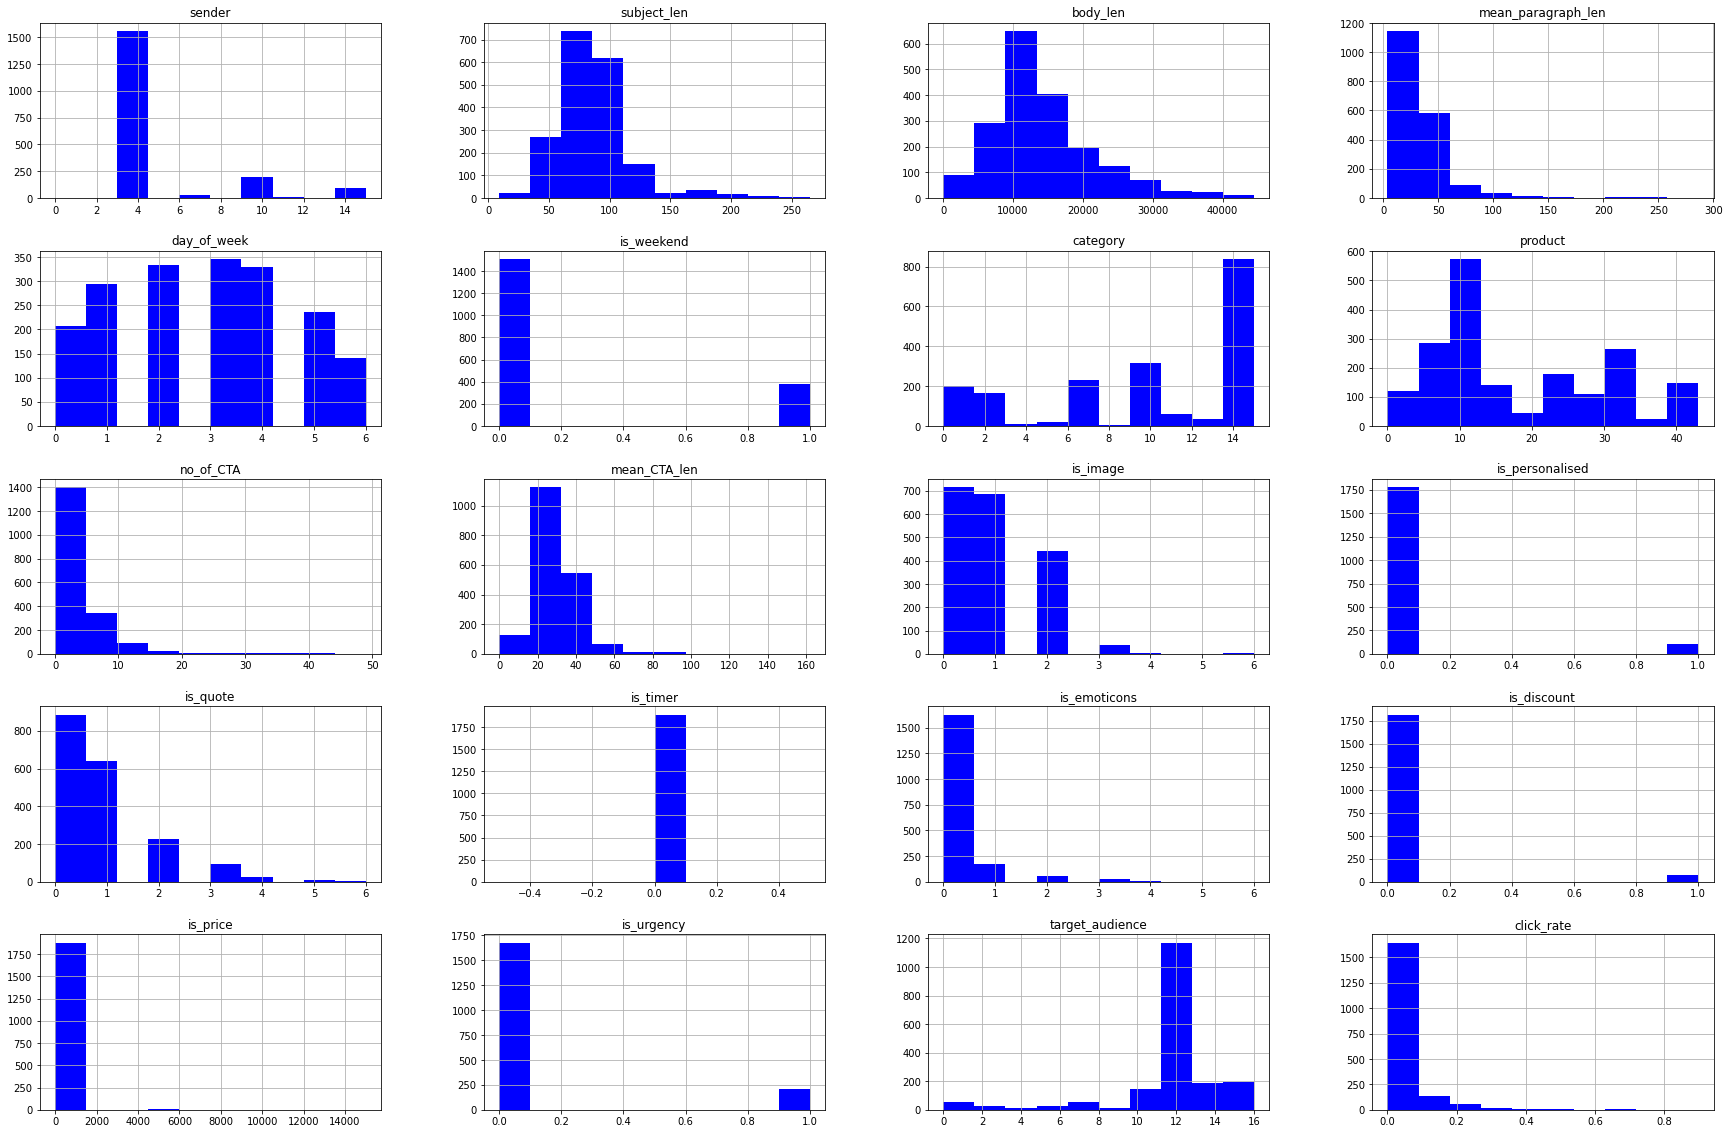

In [14]:
#ploting histogram to check distribution of data
train.hist( color = "blue",figsize=([30,20]))
plt.show

Text(0, 0.5, 'Frequency')

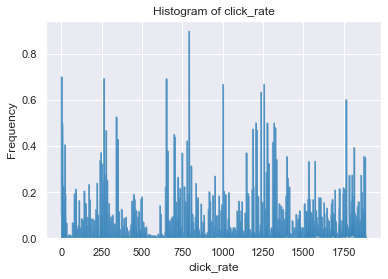

In [15]:
#ploting histogram to target  feature
sns.set(style="dark")
sns.set(style="darkgrid", color_codes=True)
train.click_rate.plot.area(color='tab:blue',stacked=None)
plt.title('Histogram of click_rate')
plt.xlabel('click_rate')
plt.ylabel('Frequency')

<AxesSubplot:ylabel='click_rate'>

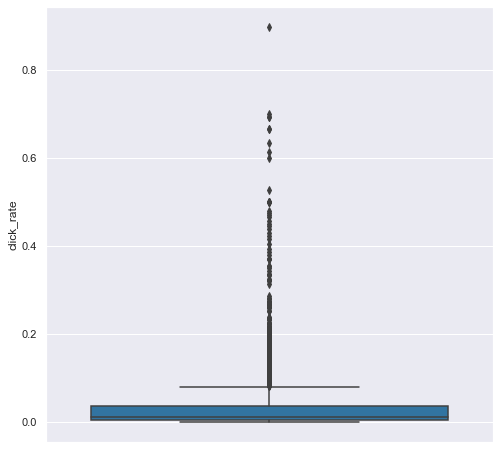

In [16]:
# ploting boxplot to target feature
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(style="dark")
sns.set(style="darkgrid", color_codes=True)
sns.boxplot(y=train.click_rate , color='tab:blue')

Text(0, 0.5, 'Frequency')

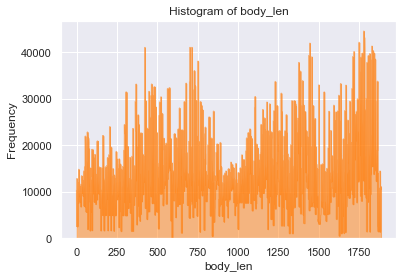

In [17]:
#ploting histogram to body_len feature
train.body_len.plot.area(color='tab:orange',stacked=None)
plt.title('Histogram of body_len')
plt.xlabel('body_len')
plt.ylabel('Frequency')

<AxesSubplot:ylabel='body_len'>

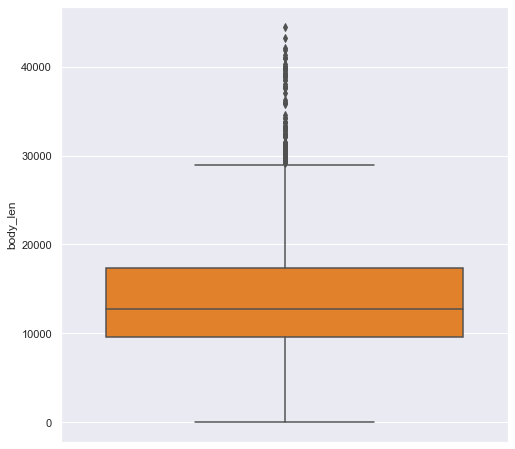

In [18]:
# ploting box plot to body_len feature
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(style="dark")
sns.set(style="darkgrid", color_codes=True)
sns.boxplot(y=train.body_len, color='tab:orange')

Text(0, 0.5, 'Frequency')

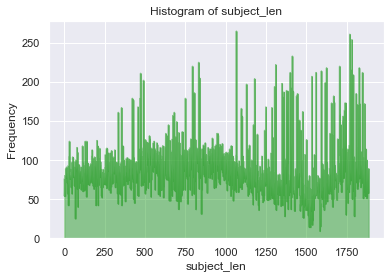

In [19]:
#ploting histogram to subject_len feature
train.subject_len.plot.area(color='tab:green',stacked=None)
plt.title('Histogram of subject_len')
plt.xlabel('subject_len')
plt.ylabel('Frequency')

<AxesSubplot:ylabel='subject_len'>

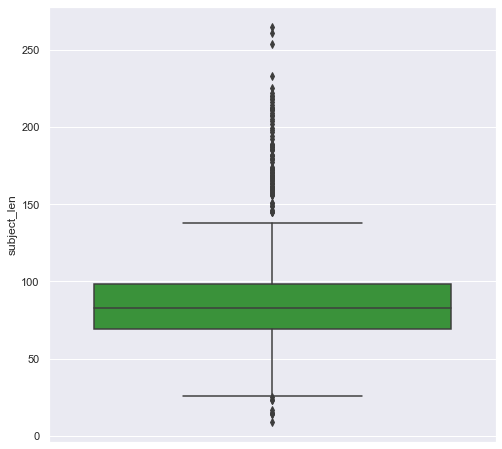

In [20]:
# ploting box plot to subject_len feature
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(style="dark")
sns.set(style="darkgrid", color_codes=True)
sns.boxplot(y=train.subject_len, color="tab:green")

Text(0, 0.5, 'Frequency')

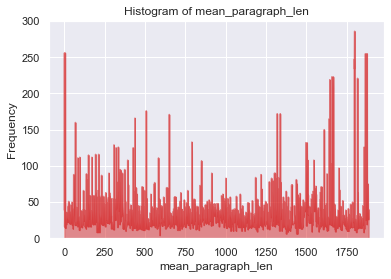

In [21]:
#ploting histogram to mean_paragraph_len feature
train.mean_paragraph_len.plot.area(color='tab:red',stacked=None)
plt.title('Histogram of mean_paragraph_len')
plt.xlabel('mean_paragraph_len')
plt.ylabel('Frequency')

<AxesSubplot:ylabel='mean_paragraph_len'>

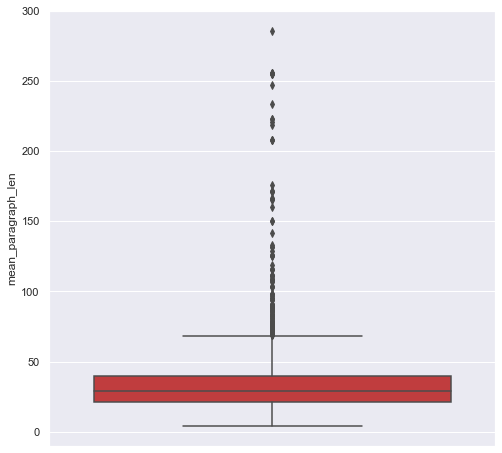

In [22]:
# ploting box plot to mean_paragraph_len feature
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(style="dark")
sns.set(style="darkgrid", color_codes=True)
sns.boxplot(y=train.mean_paragraph_len, color="tab:red")

Text(0, 0.5, 'Frequency')

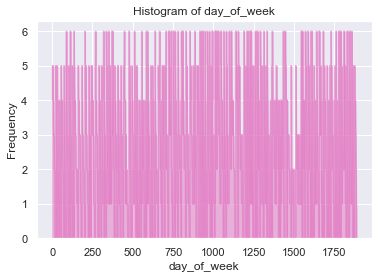

In [23]:
# ploting histogram to day_of_week feature
train.day_of_week.plot.area(color='tab:pink',stacked=None)
plt.title('Histogram of day_of_week')
plt.xlabel('day_of_week')
plt.ylabel('Frequency')

<AxesSubplot:ylabel='day_of_week'>

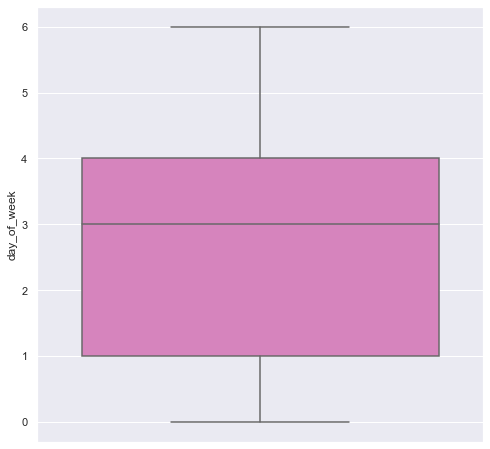

In [24]:
# ploting box plot to day_of_week feature
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(style="dark")
sns.set(style="darkgrid", color_codes=True)
sns.boxplot(y=train.day_of_week, color="tab:pink")

Text(0, 0.5, 'Frequency')

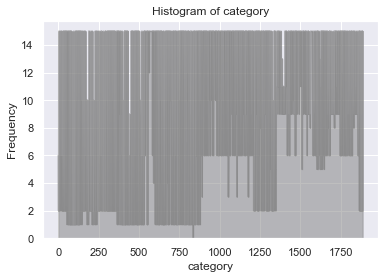

In [25]:
# ploting histogram to category feature
train.category.plot.area(color='tab:gray',stacked=None)
plt.title('Histogram of category')
plt.xlabel('category')
plt.ylabel('Frequency')

<AxesSubplot:ylabel='category'>

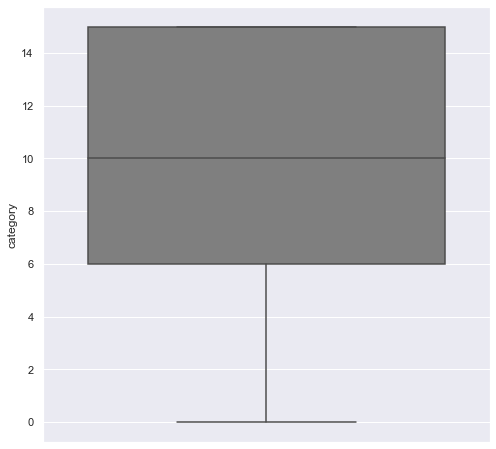

In [26]:
# ploting box plot to category feature
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(style="dark")
sns.set(style="darkgrid", color_codes=True)
sns.boxplot(y=train.category, color="tab:gray")

Text(0, 0.5, 'Frequency')

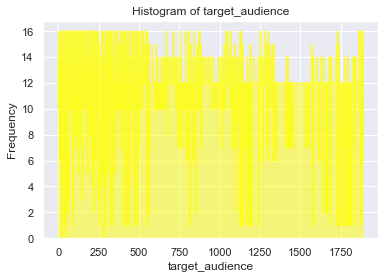

In [27]:
 #ploting histogram to target_audience feature
train.target_audience.plot.area(color='yellow',stacked=None)
plt.title('Histogram of target_audience')
plt.xlabel('target_audience')
plt.ylabel('Frequency')

<AxesSubplot:ylabel='target_audience'>

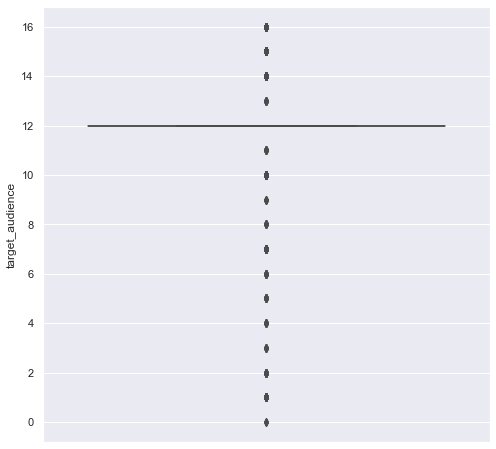

In [28]:
# ploting box plot to target_audience feature
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(style="dark")
sns.set(style="darkgrid", color_codes=True)
sns.boxplot(y=train.target_audience, color='yellow')

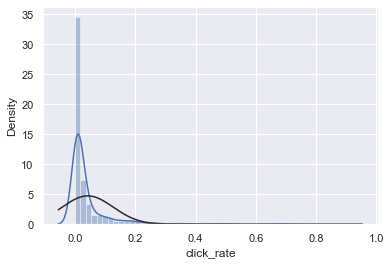

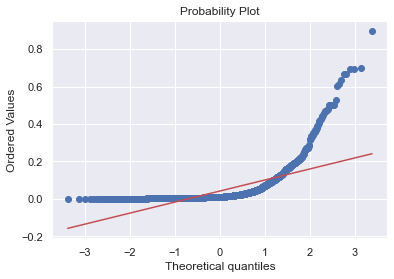

In [29]:
#ploting target with distolpt to view distibution of data
from scipy import stats
from scipy.stats import norm
sns.distplot(train['click_rate'],fit=norm);
fig = plt.figure()
res = stats.probplot(train['click_rate'], plot=plt)

## Data Preprocessing

Here  we using encoding technique as lable encoder because there is only one categorical coluumn
In that categorical column only 3 unique values are there thts why label encoding is more suitable

### Encoding

In [30]:
 # label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'times_of_day'.
train['times_of_day']= label_encoder.fit_transform(train['times_of_day'])
  
train['times_of_day'].unique()

array([2, 1, 0])

### Spliting train data into X and Y (Target and Feature)

In [31]:
#sepetaring target column(click_rate) from dataset(spliting x and y)
X=train.drop(['click_rate'], axis = 1)
y=train[['click_rate']]

In [32]:
# checking shape of x
X.shape

(1888, 20)

In [33]:
# checking shape of y
y.shape

(1888, 1)

### Splitting the Dataset into Train and Test Sets

In [34]:
# Splitting Dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1321, 20)
The shape of X_test is: (567, 20)
The shape of y_train is: (1321, 1)
The shape of y_test is: (567, 1)


## Model Building

## 1) Linear Regression with Ols

In [35]:
# building the basic model as linear regession ols 
#model fit using linear regression with ols model
linreg_ols= sm.OLS(y_train['click_rate'],X_train).fit()
print(linreg_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:             click_rate   R-squared (uncentered):                   0.316
Model:                            OLS   Adj. R-squared (uncentered):              0.306
Method:                 Least Squares   F-statistic:                              31.61
Date:                Sun, 07 Aug 2022   Prob (F-statistic):                    2.33e-93
Time:                        23:42:05   Log-Likelihood:                          1485.4
No. Observations:                1321   AIC:                                     -2933.
Df Residuals:                    1302   BIC:                                     -2834.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [36]:
# stotong actual target values to compare with predicted values 
actual_click_rate = y_test['click_rate']
#pedicting using linear regression
linreg_model_predictions = linreg_ols.predict(X_test)

In [37]:
#calculating rmse,rsquare,adj rquare
from statsmodels.tools.eval_measures import rmse
linreg_ols_rmse = rmse(actual_click_rate, linreg_model_predictions)
linreg_ols_rsquared = linreg_ols.rsquared
linreg_ols_rsquared_adj = linreg_ols.rsquared_adj 

Model Evaluation

In [38]:
#print result in tabulation
cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']
result_tabulation = pd.DataFrame(columns = cols)
linreg_ols_metrics = pd.Series({'Model': "linreg_ols ",
                     'RMSE':linreg_ols_rmse ,
                     'R-Squared': linreg_ols_rsquared,
                     'Adj. R-Squared': linreg_ols_rsquared_adj     
                   })

result_tabulation = result_tabulation.append(linreg_ols_metrics, ignore_index = True)

result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,linreg_ols,0.07768,0.3157,0.305714


## 2) Random Forest

In [39]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10000, random_state = 60)
# Train the model on training data
rf.fit(X_train, y_train)
# Use the  predict method on the test data
y_prediction = rf.predict(X_test)

In [41]:
from sklearn import metrics
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

Mean Absolute Error: 0.02909095385902212
Mean Squared Error: 0.002966585927981032
Root Mean Squared Error: 0.05446637428708682


In [42]:
# printing R2 score to evaluate model
r2_score(y_test, y_prediction)

0.5731336466924783

## Reading Test data for futures prediction
In this test data there is no target column we have to predict that target using best mosel

In [43]:
#reading test data 
test_data = pd.read_csv("test_Bk2wfZ3.csv")

In [44]:
#displaying
test_data.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14


In [45]:
#checking shape
test_data.shape

(762, 21)

In [46]:
# checking data type of test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   campaign_id         762 non-null    int64 
 1   sender              762 non-null    int64 
 2   subject_len         762 non-null    int64 
 3   body_len            762 non-null    int64 
 4   mean_paragraph_len  762 non-null    int64 
 5   day_of_week         762 non-null    int64 
 6   is_weekend          762 non-null    int64 
 7   times_of_day        762 non-null    object
 8   category            762 non-null    int64 
 9   product             762 non-null    int64 
 10  no_of_CTA           762 non-null    int64 
 11  mean_CTA_len        762 non-null    int64 
 12  is_image            762 non-null    int64 
 13  is_personalised     762 non-null    int64 
 14  is_quote            762 non-null    int64 
 15  is_timer            762 non-null    int64 
 16  is_emoticons        762 no

# Finding Null values 

In [47]:
#checking null values using isnull
test_data.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
dtype: int64

In [48]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of all categorical variables as tere are no numerical variables in the dataset
test_data.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.0,762.000000,762.000000,762.000000,762.000000,762.000000
mean,2269.500000,4.249344,86.509186,14184.263780,33.185039,2.850394,0.209974,9.590551,17.872703,4.212598,30.154856,0.942257,0.043307,0.864829,0.0,0.286089,0.031496,20.994751,0.114173,11.648294
std,220.114743,3.131927,30.586394,7179.056026,26.889537,1.791697,0.407557,5.314579,11.786908,3.911229,10.952515,0.877114,0.203681,1.028553,0.0,0.973791,0.174769,315.295844,0.318230,3.034567
min,1889.000000,1.000000,11.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2079.250000,3.000000,68.000000,9697.250000,20.000000,1.000000,0.000000,6.000000,9.000000,2.000000,24.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000
50%,2269.500000,3.000000,83.000000,12740.500000,27.500000,3.000000,0.000000,10.000000,13.000000,3.000000,29.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000
75%,2459.750000,3.000000,98.000000,16746.000000,39.000000,4.000000,0.000000,15.000000,26.000000,5.000000,35.000000,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000
max,2650.000000,15.000000,265.000000,44491.000000,498.000000,6.000000,1.000000,15.000000,44.000000,42.000000,96.000000,6.000000,1.000000,5.000000,0.0,17.000000,1.000000,5000.000000,1.000000,16.000000


## finding Co-relation

In [49]:
#checking co-realation of data
corelation=test_data.corr()
corelation

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
campaign_id,1.000000,0.411560,-0.045466,0.187940,-0.005044,0.040680,0.032372,0.236986,0.238287,0.085129,0.090509,-0.005268,0.099112,0.022825,NaN,-0.055647,0.037165,0.004605,-0.005525,-0.107759
sender,0.411560,1.000000,-0.111863,0.208592,0.064393,-0.053292,-0.080191,0.175009,0.092842,0.130724,-0.015033,-0.105251,0.088107,0.023122,NaN,-0.035915,-0.019168,-0.026597,-0.019372,-0.077728
subject_len,-0.045466,-0.111863,1.000000,0.378969,-0.147691,-0.085962,-0.041583,0.046497,-0.054034,0.403702,0.257604,-0.084130,-0.237886,0.074327,NaN,0.095914,0.099750,-0.030135,0.123488,-0.033788
body_len,0.187940,0.208592,0.378969,1.000000,-0.431620,-0.044482,-0.082402,0.033640,-0.052836,0.555295,0.116004,-0.036393,-0.208750,0.201230,NaN,-0.024321,0.041196,-0.008029,0.075161,-0.138543
mean_paragraph_len,-0.005044,0.064393,-0.147691,-0.431620,1.000000,-0.079177,-0.013382,0.083086,-0.085570,-0.178209,-0.049129,-0.095433,0.162166,-0.064804,NaN,-0.006089,-0.015223,-0.012240,-0.057602,-0.014017
day_of_week,0.040680,-0.053292,-0.085962,-0.044482,-0.079177,1.000000,0.728702,-0.050464,-0.000903,-0.084150,-0.016965,0.002021,-0.021832,-0.030953,NaN,0.020045,-0.039487,0.052085,0.059958,0.087468
is_weekend,0.032372,-0.080191,-0.041583,-0.082402,-0.013382,0.728702,1.000000,-0.048830,-0.015765,-0.036285,-0.030845,0.037638,-0.030538,-0.045055,NaN,0.013991,-0.056072,0.016769,0.037815,0.056603
category,0.236986,0.175009,0.046497,0.033640,0.083086,-0.050464,-0.048830,1.000000,0.054568,-0.051943,0.157876,-0.042007,0.114731,-0.012061,NaN,0.106201,0.129913,0.020813,0.173748,-0.023118
product,0.238287,0.092842,-0.054034,-0.052836,-0.085570,-0.000903,-0.015765,0.054568,1.000000,0.027866,0.090420,0.065764,0.091517,-0.073500,NaN,0.000429,0.035757,0.044918,-0.107174,0.046543
no_of_CTA,0.085129,0.130724,0.403702,0.555295,-0.178209,-0.084150,-0.036285,-0.051943,0.027866,1.000000,0.203466,-0.012888,-0.153429,0.054843,NaN,-0.003570,0.055552,-0.010015,0.016368,-0.035431


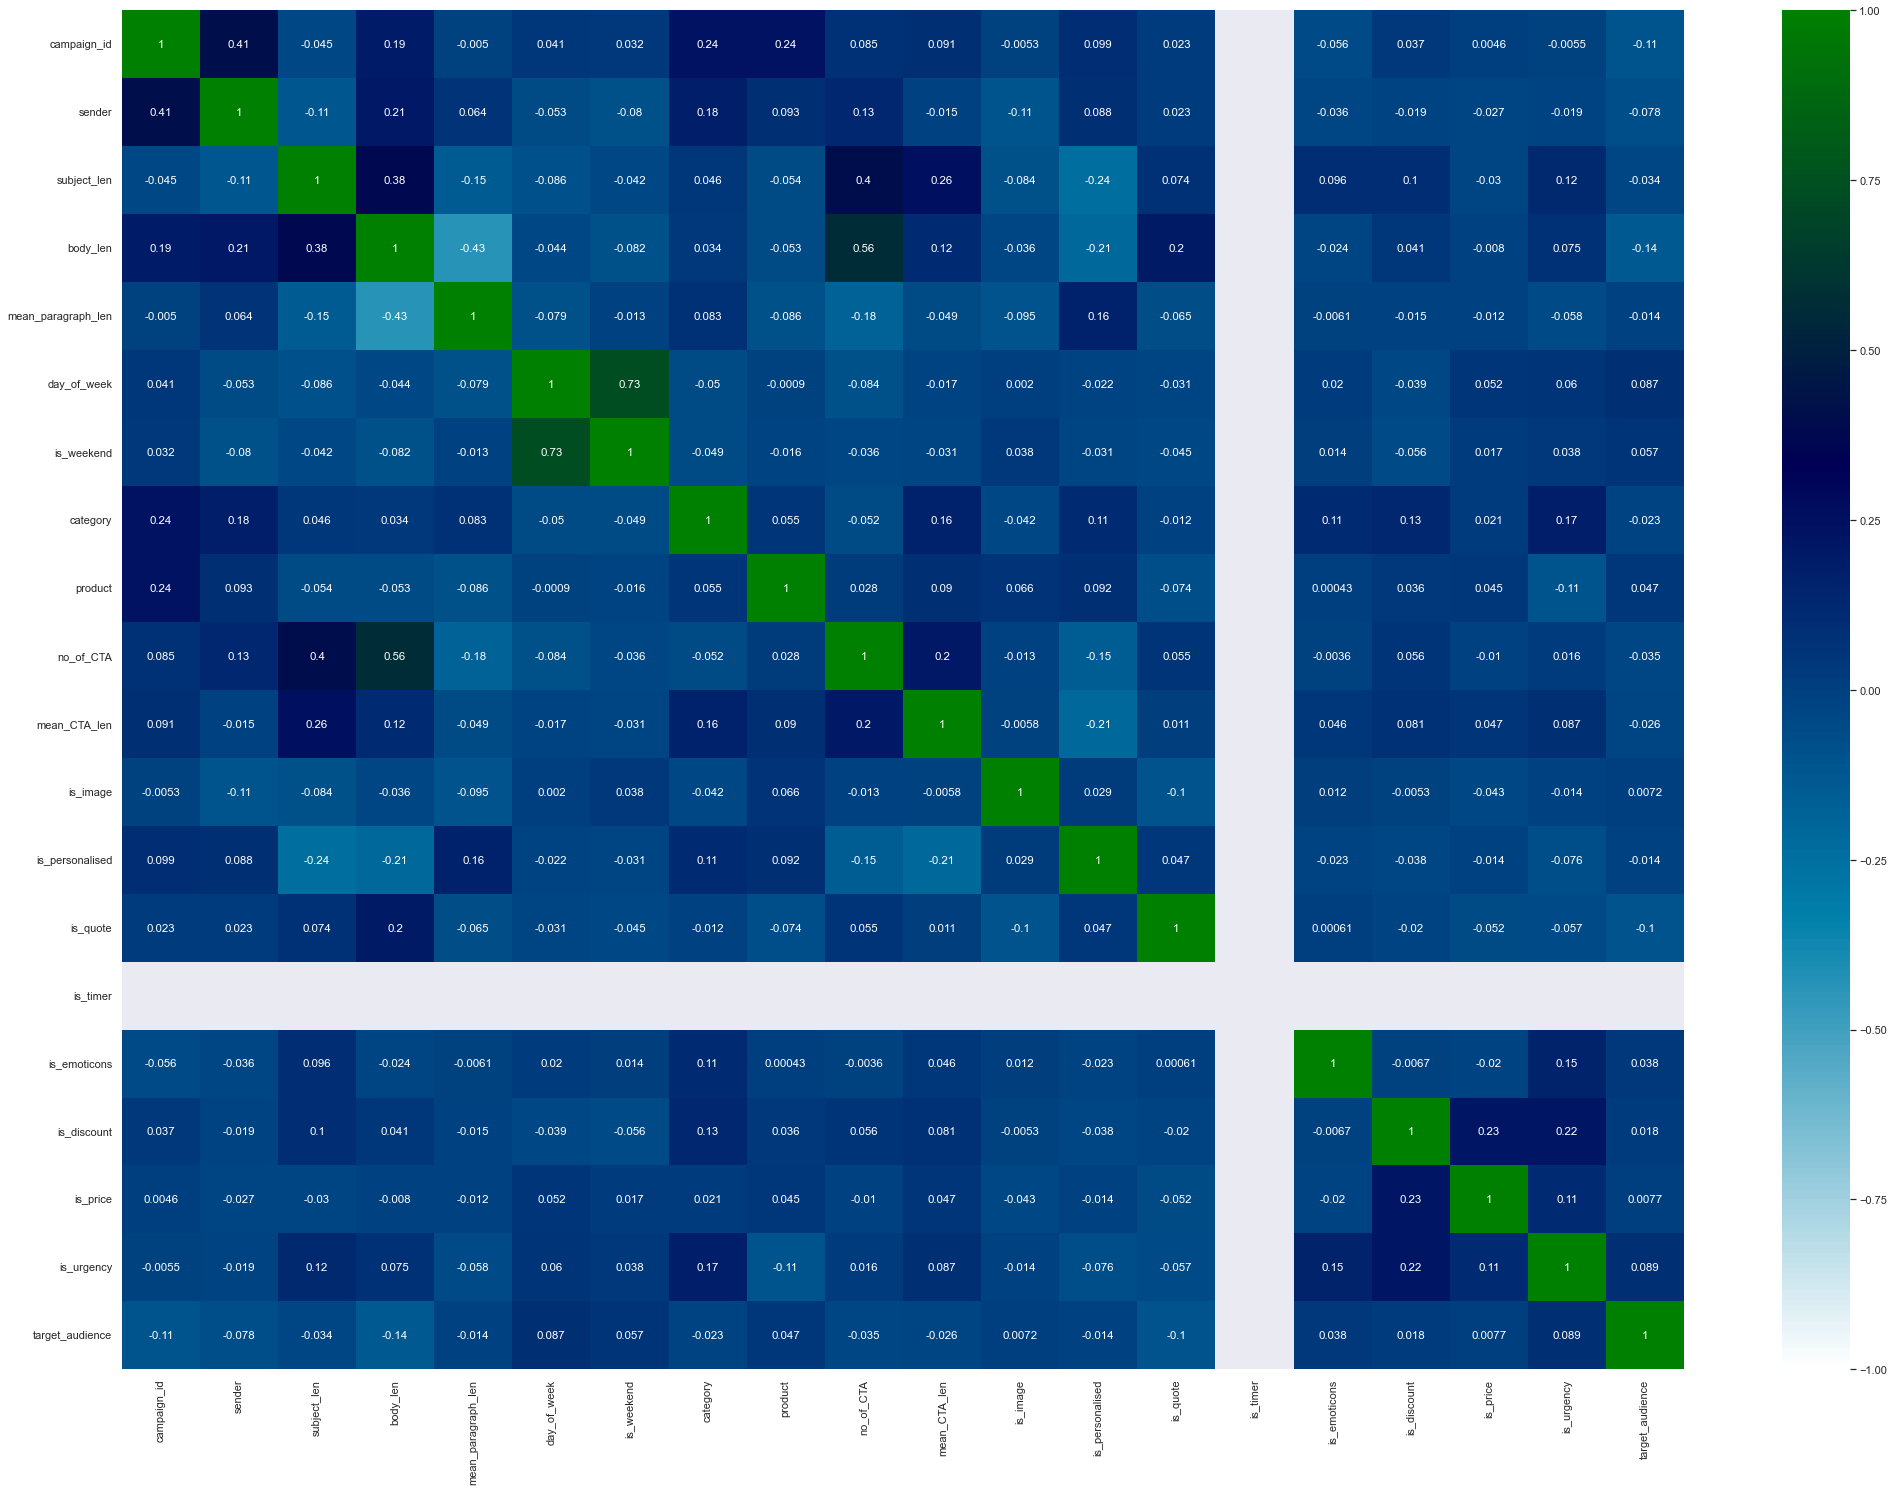

In [50]:
#ploting correlation
plt.figure(figsize = (35,25))
sns.heatmap(corelation, annot = True, vmax = 1.0, vmin = -1.0, cmap = 'ocean_r', annot_kws = {"size": 11.5})
plt.show()

saving campaign_id column  it is very necessory to future submission of predicted values 
this campaign_id is not important column to prediction but it useful to submit predicted values

In [51]:
#saving campaign_id for display future prediction 
ID_prediction=test_data["campaign_id"]
ID_prediction.head()

0    1889
1    1890
2    1891
3    1892
4    1893
Name: campaign_id, dtype: int64

In [52]:
#removing Unnecessary column from data set 
test_data=test_data.drop(['campaign_id'],axis=1)

In [53]:
#checking numeric features
numeric_fea = test_data.select_dtypes(include=np.number)
numeric_fea.columns

Index(['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'is_weekend', 'category', 'product', 'no_of_CTA',
       'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote', 'is_timer',
       'is_emoticons', 'is_discount', 'is_price', 'is_urgency',
       'target_audience'],
      dtype='object')

In [54]:
#checking catagorical features
categoric = test_data.select_dtypes(include = object)
categoric.columns

Index(['times_of_day'], dtype='object')

## Encoding

In [55]:
#encoding using lable encoder
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
test_data['times_of_day']= label_encoder.fit_transform(test_data['times_of_day'])
  
test_data['times_of_day'].unique()

array([2, 1, 0])

In [56]:
#checking shape before prediction
test_data.shape

(762, 20)

## Prediction

In [58]:
#pridiction of globle sales for test data using random forest hypertuned model
click_rate_predictions = rf.predict(test_data)
click_rate_predictions

array([0.06369657, 0.42312901, 0.18095754, 0.19307806, 0.1370699 ,
       0.03339237, 0.00832897, 0.01830094, 0.01454593, 0.03131006,
       0.02070147, 0.02365179, 0.01718179, 0.02062018, 0.01407628,
       0.00858868, 0.00818565, 0.01482123, 0.02585742, 0.04983705,
       0.01862613, 0.0297215 , 0.01087028, 0.00866657, 0.03104352,
       0.0294752 , 0.06599807, 0.01161738, 0.06642072, 0.01416443,
       0.01237567, 0.03759244, 0.00930068, 0.17598362, 0.0678438 ,
       0.04523498, 0.01081085, 0.00644703, 0.00756061, 0.06814986,
       0.00960872, 0.06388716, 0.00876676, 0.05745501, 0.05779715,
       0.00475215, 0.03854471, 0.0186456 , 0.03229249, 0.00973254,
       0.01813854, 0.01425255, 0.00914574, 0.01628782, 0.01009959,
       0.01051032, 0.02852057, 0.01492781, 0.00657848, 0.00413831,
       0.06200187, 0.00561511, 0.01069554, 0.00686924, 0.0257716 ,
       0.01557197, 0.00714395, 0.07133962, 0.01123925, 0.09720595,
       0.00985668, 0.21913765, 0.01455575, 0.01507105, 0.09209

## storing predicted values in the sample submmision format 

In [59]:
#creating the dataframe for predicted values
df = pd.DataFrame(click_rate_predictions)
df.rename({0:"click_rate"},inplace =True,axis=1)

In [60]:
# joining the predicted values with click_rate
dataframe  = pd.DataFrame()
dataframe = pd.concat([ID_prediction.reset_index(drop=True),df.reset_index(drop=True)],axis=1)
dataframe

,campaign_id,click_rate
0,1889,0.063697
1,1890,0.423129
2,1891,0.180958
3,1892,0.193078
4,1893,0.137070
...,...,...
757,2646,0.013188
758,2647,0.012794
759,2648,0.021216
760,2649,0.280292


## saving Final predicted values in csv Formate

In [61]:
#save the file into csv file
dataframe.to_csv("click_rate_predictions.csv",index=False)